In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
import spacy
from spacy import displacy

In [7]:
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl (13.7 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


C:\Users\larso\Anaconda3\envs\vi\lib\site-packages\cupy\_environment.py:211: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  'CUDA path could not be detected.'
C:\Users\larso\Anaconda3\envs\vi\lib\site-packages\cupy\_environment.py:211: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  'CUDA path could not be detected.'
C:\Users\larso\Anaconda3\envs\vi\lib\site-packages\cupy\_environment.py:211: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  'CUDA path could not be detected.'
C:\Users\larso\Anaconda3\envs\vi\lib\site-packages\cupy\_environment.py:211: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  'CUDA path could not be detected.'
C:\Users\larso\Anaconda3\envs\vi\lib\site-packages\cupy\_environment.py:211: UserWarning: CUDA path could not be detected. Set C

In [8]:
df=pd.read_csv('C:\ADS2001\Virtual Internships-20210323/virtualInternshipData_ADS2001.csv', encoding = "ISO-8859–1")

In [9]:
df

,Unnamed: 0,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
0,1,1,a,1,PRNLT,Hello team. Welcome to Nephrotex!,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,5
1,2,1,a,2,PRNLT,I'm Maria Williams. I'll be your design adviso...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,11
2,3,1,a,3,PRNLT,I'm here to help if you have any questions.,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,9
3,4,1,a,4,PRNLT,Please introduce yourselves with the name you ...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,1,0,0,4,51
4,5,1,a,5,PRNLT,I just want to make sure everyone has found th...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19175,19176,392,o,19179,PESPVP,yes,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,5,1
19176,19177,388,o,19180,PESPVP,sounds good,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,8,2
19177,19178,367,o,19181,PESPVP,"Well, we are out of time for our meeting.",6,Mentor,Reflection team discussion of first batch results,0,0,0,0,0,0,4,9
19178,19179,393,o,19182,PESPVP,Precisely,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,4,1


In [10]:
text = df["content"].str.cat()

In [11]:
test = nlp("Apple is looking at buying U.K. startup for $1 billion")

In [12]:
displacy.render(test)

In [9]:
df.columns

Index(['Unnamed: 0', 'userIDs', 'implementation', 'Line_ID', 'ChatGroup',
       'content', 'group_id', 'RoleName', 'roomName', 'm_experimental_testing',
       'm_making_design_choices', 'm_asking_questions',
       'j_customer_consultants_requests',
       'j_performance_parameters_requirements', 'j_communication',
       'OutcomeScore', 'wordCount'],
      dtype='object')

In [10]:
df["content"]

0                        Hello team. Welcome to Nephrotex!
1        I'm Maria Williams. I'll be your design adviso...
2              I'm here to help if you have any questions.
3        Please introduce yourselves with the name you ...
4        I just want to make sure everyone has found th...
                               ...                        
19175                                                  yes
19176                                          sounds good
19177            Well, we are out of time for our meeting.
19178                                            Precisely
19179    Good discussion today! Don't forget to complet...
Name: content, Length: 19180, dtype: object

In [11]:
test = nlp(df["content"][68])

In [12]:
displacy.render(test)

In [13]:
displacy.render(test, style = "ent")

In [14]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)

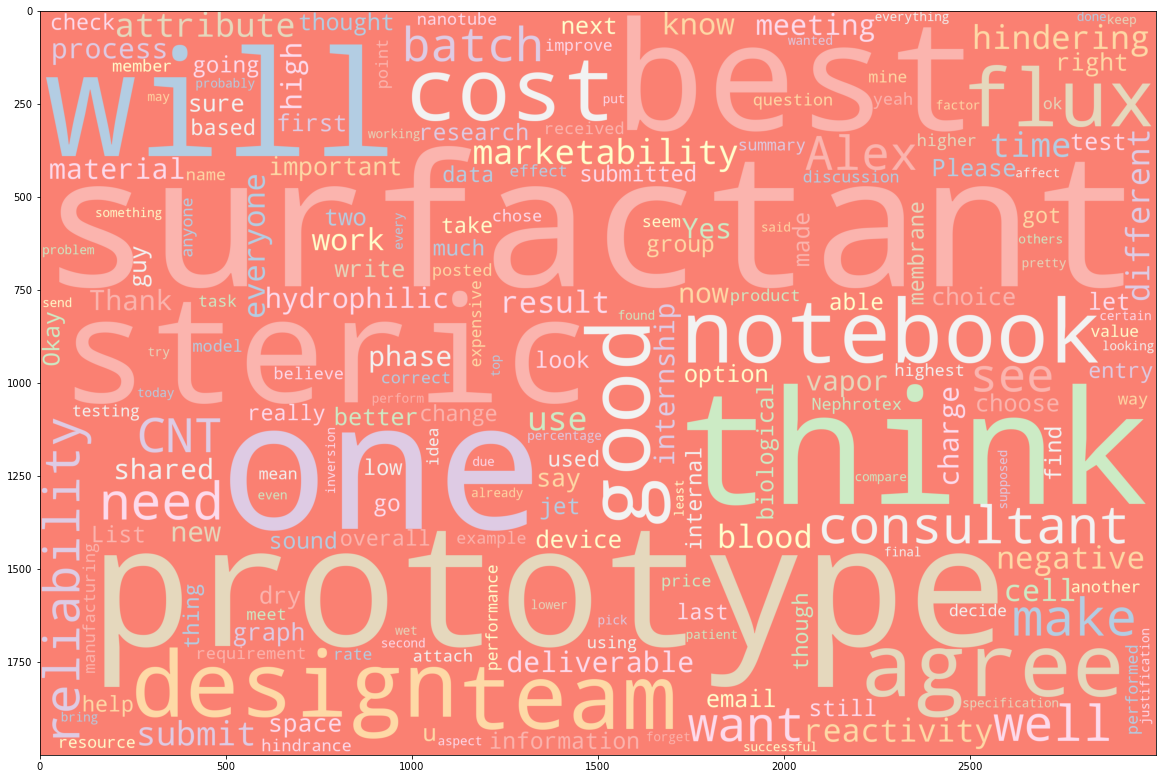

In [15]:
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud);
plt.savefig("wordcloud")

In [16]:
#for doc in nlp.pipe(df["content"].tolist(), disable=["ner"]):
 #   print(doc)

In [17]:
#categorised_data = [(entry, {"cats": {"score": df["OutcomeScore"][index]}}) for index, entry in enumerate(df["content"].tolist())]

<AxesSubplot:ylabel='Frequency'>

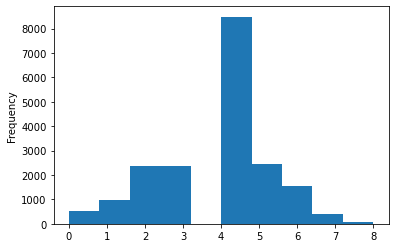

In [18]:
df["OutcomeScore"].plot.hist()

In [19]:
test_data = nlp.pipe(df["content"].tolist()[:1000])

In [20]:
displacy.render(test, style="ent")

In [21]:
spacy.explain("GPE")

'Countries, cities, states'

C:\Users\larso\Anaconda3\envs\vi\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


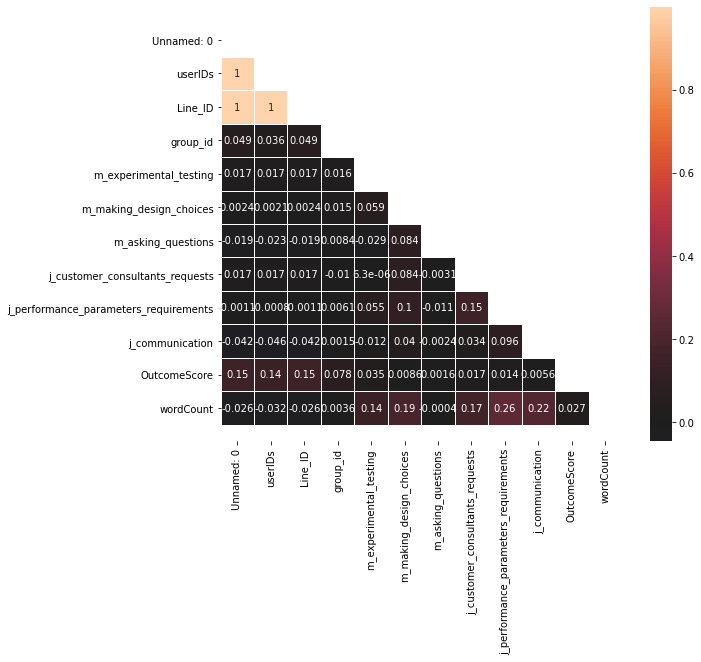

In [22]:
 corrs = df.corr() 
    # calculate the correlation table
# as this is a symmetric table, set up a mask so that we only plot values below the main diagonal
mask = np.triu(np.ones_like(corrs, dtype=np.bool)) 
f, ax = plt.subplots(figsize=(10, 8)) 
    # initialise the plots and axes
# plot the correlations as a seaborn heatmap, with a colourbar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
# do some fiddling so that the top and bottom are not obscured
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);

In [23]:
df.corr()

,Unnamed: 0,userIDs,Line_ID,group_id,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
Unnamed: 0,1.000000,0.997259,1.000000,0.048681,0.017029,0.002351,-0.019482,0.016871,-0.001096,-0.042411,0.151648,-0.026453
userIDs,0.997259,1.000000,0.997258,0.036229,0.016608,0.002110,-0.023124,0.016692,-0.000798,-0.046073,0.140240,-0.032077
Line_ID,1.000000,0.997258,1.000000,0.048671,0.017026,0.002352,-0.019481,0.016873,-0.001095,-0.042409,0.151660,-0.026451
group_id,0.048681,0.036229,0.048671,1.000000,0.016049,0.015136,0.008386,-0.010067,0.006106,0.001465,0.078000,0.003622
m_experimental_testing,0.017029,0.016608,0.017026,0.016049,1.000000,0.058894,-0.028855,0.000006,0.055007,-0.012185,0.035026,0.139057
m_making_design_choices,0.002351,0.002110,0.002352,0.015136,0.058894,1.000000,0.083635,0.083841,0.104069,0.039969,0.008648,0.193185
m_asking_questions,-0.019482,-0.023124,-0.019481,0.008386,-0.028855,0.083635,1.000000,-0.003088,-0.011052,-0.002379,0.001630,-0.000397
j_customer_consultants_requests,0.016871,0.016692,0.016873,-0.010067,0.000006,0.083841,-0.003088,1.000000,0.154169,0.034466,0.016513,0.168340
j_performance_parameters_requirements,-0.001096,-0.000798,-0.001095,0.006106,0.055007,0.104069,-0.011052,0.154169,1.000000,0.096100,0.013742,0.257028
j_communication,-0.042411,-0.046073,-0.042409,0.001465,-0.012185,0.039969,-0.002379,0.034466,0.096100,1.000000,0.005550,0.219757


In [35]:
import spacy

import pandas as pd

from spacy.tokens import DocBin

nlp = spacy.load("en_core_web_sm")

data = pd.read_csv("data/data.csv")

# Sets up one hot encoded labels
fields = ["m_experimental_testing", "m_making_design_choices", "m_asking_questions", "j_customer_consultants_requests", "j_performance_parameters_requirements", "j_communication"]
def set_cats(doc, value):
    for index, category in enumerate(fields):
        doc.cats[category] = value[index]
    return doc

data = [(field[0], (field[1:])) for field in data[["content", *fields]].values]
categorised_data = [set_cats(doc, score) for doc, score in nlp.pipe(data, as_tuples=True)]


split_percent = 70
train_end = (len(categorised_data) // 100) * split_percent

train_data, validation_data = categorised_data[:train_end], categorised_data[train_end:]
train_bin, validation_bin = DocBin(docs=train_data), DocBin(docs=validation_data)
train_bin.to_disk("data/train.spacy"), validation_bin.to_disk("data/validation.spacy")

(None, None)

In [13]:
spacy.explain("pcomp")

'complement of preposition'

In [14]:
spacy.explain("prep")

'prepositional modifier'

In [15]:
spacy.explain("dobj")

'direct object'

In [16]:
spacy.explain("advcl")

'adverbial clause modifier'